In [1]:
from taxi import TaxiEnv
import numpy as np

env = TaxiEnv()

In [2]:
# display the game state
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [8]:
import numpy as np
n_states = env.observation_space.n
n_actions = env.action_space.n
def get_random_policy():
    """
    Build a numpy array representing agent policy.
    This array must have one element per each of 16 environment states.
    Element must be an integer from 0 to 3, representing action
    to take from that state.
    """
    return np.random.randint(0, n_actions, n_states)

### Let's evaluate!
* Implement a simple function that runs one game and returns the total reward

In [6]:
def sample_reward(env, policy, t_max=200):
    """
    Interact with an environment, return sum of all rewards.
    If game doesn't end on t_max (e.g. agent walks into a wall), 
    force end the game and return whatever reward you got so far.
    Tip: see signature of env.step(...) method above.
    """
    s = env.reset()
    total_reward = 0

    for ind in range(t_max):
        action = policy[s]
        s, reward, is_done, _ = env.step(action)
        total_reward += reward
        if (is_done):
            break
    return total_reward

In [7]:
def evaluate(env, policy, n_times=100):
    """Run several evaluations and average the score the policy gets."""
    rewards = []
    for _ in range(n_times):
        rewards.append(sample_reward(env, policy))
    return float(np.mean(np.array(rewards)))      

# Part II Genetic algorithm 

The next task is to devise some more effecient way to perform policy search.
We'll do that with a bare-bones evolutionary algorithm.
[unless you're feeling masochistic and wish to do something entirely different which is bonus points if it works]

In [9]:
def crossover(policy1, policy2, p=0.5):
    """
    for each state, with probability p take action from policy1, else policy2
    """
    cross_policy = []
    
    return np.choose(np.random.choice(np.array([0, 1]), 
                     size = policy1.shape, 
                     p = [p, 1-p]),
                     choices=[policy1, policy2])

In [10]:
def mutation(policy, p=0.1):
    """
    for each state, with probability p replace action with random action
    Tip: mutation can be written as crossover with random policy
    """
#     <your code>
    return crossover(get_random_policy(), policy, p)
    

In [79]:
n_epochs = 100 #how many cycles to make
pool_size = 100 #how many policies to maintain
n_crossovers = 50 #how many crossovers to make on each step
n_mutations = 50 #how many mutations to make on each tick

In [80]:
print("initializing...")
pool = [get_random_policy() for _ in range(pool_size)]
pool_scores = [sample_reward(env, policy) for policy in pool]


initializing...


In [81]:
assert type(pool) == type(pool_scores) == list
assert len(pool) == len(pool_scores) == pool_size
assert all([type(score) in (float, int) for score in pool_scores])


In [82]:
from random import choice
from tqdm import tqdm

In [84]:
epoch_scores = []

hello


In [85]:
from matplotlib import pylab as plt
import pandas as pd
%matplotlib inline

In [86]:
file = pd.DataFrame(columns=["epochs", "pool_size", "cross", "mut", "score", "isdone", "steps_num", "policy"])    

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Epoch 0:
best score: -774.47


  1%|▊                                                                               | 1/100 [00:51<1:25:32, 51.84s/it]

Epoch 1:
best score: -828.56


  2%|█▌                                                                              | 2/100 [01:41<1:23:40, 51.23s/it]

Epoch 2:
best score: -773.93


  3%|██▍                                                                             | 3/100 [02:51<1:31:37, 56.68s/it]

Epoch 3:
best score: -738.29


  4%|███▏                                                                            | 4/100 [03:40<1:27:09, 54.48s/it]

Epoch 4:
best score: -810.11


  5%|████                                                                            | 5/100 [04:29<1:23:51, 52.96s/it]

Epoch 5:
best score: -774.47


  6%|████▊                                                                           | 6/100 [05:19<1:21:27, 52.00s/it]

Epoch 6:
best score: -702.56


  7%|█████▌                                                                          | 7/100 [06:12<1:20:59, 52.25s/it]

Epoch 7:
best score: -720.56


  8%|██████▍                                                                         | 8/100 [07:03<1:19:33, 51.88s/it]

Epoch 8:
best score: -649.01


  9%|███████▏                                                                        | 9/100 [07:54<1:18:06, 51.51s/it]

Epoch 9:
best score: -630.29


 10%|███████▉                                                                       | 10/100 [08:46<1:17:36, 51.74s/it]

Epoch 10:
best score: -577.01


 11%|████████▋                                                                      | 11/100 [09:45<1:20:12, 54.07s/it]

Epoch 11:
best score: -666.56


 12%|█████████▍                                                                     | 12/100 [10:44<1:21:22, 55.48s/it]

Epoch 12:
best score: -647.93


 13%|██████████▎                                                                    | 13/100 [11:39<1:20:10, 55.29s/it]

Epoch 13:
best score: -667.37


 14%|███████████                                                                    | 14/100 [12:33<1:18:39, 54.88s/it]

Epoch 14:
best score: -577.1


 15%|███████████▊                                                                   | 15/100 [13:33<1:20:06, 56.55s/it]

Epoch 15:
best score: -541.64


 16%|████████████▋                                                                  | 16/100 [14:28<1:18:33, 56.11s/it]

Epoch 16:
best score: -575.75


 17%|█████████████▍                                                                 | 17/100 [15:20<1:15:43, 54.75s/it]

Epoch 17:
best score: -577.28


 18%|██████████████▏                                                                | 18/100 [16:19<1:16:37, 56.07s/it]

Epoch 18:
best score: -576.2


 19%|███████████████                                                                | 19/100 [17:14<1:15:03, 55.59s/it]

Epoch 19:
best score: -612.47


 20%|███████████████▊                                                               | 20/100 [18:11<1:14:49, 56.12s/it]

Epoch 20:
best score: -523.19


 21%|████████████████▌                                                              | 21/100 [19:11<1:15:15, 57.16s/it]

Epoch 21:
best score: -522.65


 22%|█████████████████▍                                                             | 22/100 [20:06<1:13:38, 56.65s/it]

Epoch 22:
best score: -559.19


 23%|██████████████████▏                                                            | 23/100 [21:05<1:13:40, 57.40s/it]

Epoch 23:
best score: -523.1


 24%|██████████████████▉                                                            | 24/100 [21:59<1:11:31, 56.47s/it]

Epoch 24:
best score: -505.01


 25%|███████████████████▊                                                           | 25/100 [23:04<1:13:39, 58.93s/it]

Epoch 25:
best score: -505.28


 26%|████████████████████▌                                                          | 26/100 [24:02<1:12:25, 58.73s/it]

Epoch 26:
best score: -486.56


 27%|█████████████████████▎                                                         | 27/100 [24:58<1:10:11, 57.69s/it]

Epoch 27:
best score: -469.55


 28%|██████████████████████                                                         | 28/100 [25:59<1:10:34, 58.82s/it]

Epoch 28:
best score: -487.1


 29%|██████████████████████▉                                                        | 29/100 [27:01<1:10:40, 59.72s/it]

Epoch 29:
best score: -487.19


 30%|███████████████████████▋                                                       | 30/100 [27:56<1:07:59, 58.28s/it]

Epoch 30:
best score: -487.37


 31%|████████████████████████▍                                                      | 31/100 [28:49<1:05:23, 56.86s/it]

Epoch 31:
best score: -451.82


 32%|█████████████████████████▎                                                     | 32/100 [29:44<1:03:31, 56.06s/it]

Epoch 32:
best score: -451.28


 33%|██████████████████████████                                                     | 33/100 [30:38<1:02:03, 55.58s/it]

Epoch 33:
best score: -469.46


 34%|██████████████████████████▊                                                    | 34/100 [31:33<1:00:53, 55.36s/it]

Epoch 34:
best score: -451.37


 35%|████████████████████████████▎                                                    | 35/100 [32:28<59:59, 55.38s/it]

Epoch 35:
best score: -379.82


 36%|█████████████████████████████▏                                                   | 36/100 [33:22<58:40, 55.01s/it]

Epoch 36:
best score: -433.55


 37%|█████████████████████████████▉                                                   | 37/100 [34:16<57:11, 54.47s/it]

Epoch 37:
best score: -361.64


 38%|██████████████████████████████▊                                                  | 38/100 [35:11<56:35, 54.76s/it]

Epoch 38:
best score: -397.46


 39%|███████████████████████████████▌                                                 | 39/100 [36:06<55:38, 54.73s/it]

Epoch 39:
best score: -379.82


 40%|████████████████████████████████▍                                                | 40/100 [37:00<54:29, 54.49s/it]

Epoch 40:
best score: -379.64


 41%|█████████████████████████████████▏                                               | 41/100 [37:54<53:30, 54.42s/it]

Epoch 41:
best score: -379.82


 42%|██████████████████████████████████                                               | 42/100 [38:50<53:13, 55.05s/it]

Epoch 42:
best score: -361.37


 43%|██████████████████████████████████▊                                              | 43/100 [39:45<52:15, 55.02s/it]

Epoch 43:
best score: -343.91


 44%|███████████████████████████████████▋                                             | 44/100 [40:40<51:09, 54.82s/it]

Epoch 44:
best score: -325.91


 45%|████████████████████████████████████▍                                            | 45/100 [41:33<49:55, 54.47s/it]

Epoch 45:
best score: -343.91


 46%|█████████████████████████████████████▎                                           | 46/100 [42:28<48:59, 54.44s/it]

Epoch 46:
best score: -361.82


 47%|██████████████████████████████████████                                           | 47/100 [43:22<48:01, 54.37s/it]

Epoch 47:
best score: -343.82


 48%|██████████████████████████████████████▉                                          | 48/100 [44:16<47:09, 54.41s/it]

Epoch 48:
best score: -379.55


 49%|███████████████████████████████████████▋                                         | 49/100 [45:10<46:04, 54.21s/it]

Epoch 49:
best score: -325.91


 50%|████████████████████████████████████████▌                                        | 50/100 [46:06<45:32, 54.65s/it]

Epoch 50:
best score: -289.91


 51%|█████████████████████████████████████████▎                                       | 51/100 [47:00<44:32, 54.53s/it]

Epoch 51:
best score: -290.0


 52%|██████████████████████████████████████████                                       | 52/100 [47:54<43:26, 54.31s/it]

Epoch 52:
best score: -289.82


 53%|██████████████████████████████████████████▉                                      | 53/100 [48:47<42:18, 54.01s/it]

Epoch 53:
best score: -307.91


 54%|███████████████████████████████████████████▋                                     | 54/100 [49:42<41:36, 54.28s/it]

Epoch 54:
best score: -271.73


 55%|████████████████████████████████████████████▌                                    | 55/100 [50:36<40:36, 54.14s/it]

Epoch 55:
best score: -289.82


 56%|█████████████████████████████████████████████▎                                   | 56/100 [51:29<39:31, 53.91s/it]

Epoch 56:
best score: -325.82


 57%|██████████████████████████████████████████████▏                                  | 57/100 [52:23<38:39, 53.93s/it]

Epoch 57:
best score: -325.91


 58%|██████████████████████████████████████████████▉                                  | 58/100 [53:18<37:51, 54.08s/it]

Epoch 58:
best score: -271.46


 59%|███████████████████████████████████████████████▊                                 | 59/100 [54:12<36:55, 54.05s/it]

Epoch 59:
best score: -290.0


 60%|████████████████████████████████████████████████▌                                | 60/100 [55:06<36:03, 54.10s/it]

Epoch 60:
best score: -271.91


 61%|█████████████████████████████████████████████████▍                               | 61/100 [56:00<35:12, 54.18s/it]

Epoch 61:
best score: -325.64


 62%|██████████████████████████████████████████████████▏                              | 62/100 [56:55<34:23, 54.29s/it]

Epoch 62:
best score: -289.91


 63%|███████████████████████████████████████████████████                              | 63/100 [57:49<33:22, 54.14s/it]

Epoch 63:
best score: -289.19


 64%|███████████████████████████████████████████████████▊                             | 64/100 [58:43<32:32, 54.23s/it]

Epoch 64:
best score: -235.37


 65%|████████████████████████████████████████████████████▋                            | 65/100 [59:36<31:28, 53.96s/it]

Epoch 65:
best score: -253.82


 66%|████████████████████████████████████████████████████▏                          | 66/100 [1:00:29<30:20, 53.54s/it]

Epoch 66:
best score: -307.55


 67%|████████████████████████████████████████████████████▉                          | 67/100 [1:01:23<29:30, 53.66s/it]

Epoch 67:
best score: -253.91


 68%|█████████████████████████████████████████████████████▋                         | 68/100 [1:02:18<28:51, 54.09s/it]

Epoch 68:
best score: -253.82


 69%|██████████████████████████████████████████████████████▌                        | 69/100 [1:03:13<28:02, 54.27s/it]

Epoch 69:
best score: -271.64


 70%|███████████████████████████████████████████████████████▎                       | 70/100 [1:04:07<27:12, 54.42s/it]

Epoch 70:
best score: -253.73


 71%|████████████████████████████████████████████████████████                       | 71/100 [1:05:01<26:08, 54.07s/it]

Epoch 71:
best score: -253.91


 72%|████████████████████████████████████████████████████████▉                      | 72/100 [1:05:55<25:14, 54.09s/it]

Epoch 72:
best score: -236.0


 73%|█████████████████████████████████████████████████████████▋                     | 73/100 [1:06:51<24:34, 54.61s/it]

Epoch 73:
best score: -253.91


 74%|██████████████████████████████████████████████████████████▍                    | 74/100 [1:07:45<23:36, 54.47s/it]

Epoch 74:
best score: -254.0


 75%|███████████████████████████████████████████████████████████▎                   | 75/100 [1:08:39<22:38, 54.35s/it]

Epoch 75:
best score: -235.91


 76%|████████████████████████████████████████████████████████████                   | 76/100 [1:09:33<21:42, 54.26s/it]

Epoch 76:
best score: -200.0


 77%|████████████████████████████████████████████████████████████▊                  | 77/100 [1:10:27<20:49, 54.32s/it]

Epoch 77:
best score: -235.91


 78%|█████████████████████████████████████████████████████████████▌                 | 78/100 [1:11:21<19:52, 54.21s/it]

Epoch 78:
best score: -200.0


 79%|██████████████████████████████████████████████████████████████▍                | 79/100 [1:12:16<18:57, 54.18s/it]

Epoch 79:
best score: -218.0


 80%|███████████████████████████████████████████████████████████████▏               | 80/100 [1:13:09<18:01, 54.06s/it]

Epoch 80:
best score: -218.0


 81%|███████████████████████████████████████████████████████████████▉               | 81/100 [1:14:02<16:59, 53.65s/it]

Epoch 81:
best score: -217.73


 82%|████████████████████████████████████████████████████████████████▊              | 82/100 [1:14:56<16:09, 53.89s/it]

Epoch 82:
best score: -235.64


 83%|█████████████████████████████████████████████████████████████████▌             | 83/100 [1:15:52<15:22, 54.27s/it]

Epoch 83:
best score: -236.0


 84%|██████████████████████████████████████████████████████████████████▎            | 84/100 [1:16:46<14:28, 54.29s/it]

Epoch 84:
best score: -218.0


 85%|███████████████████████████████████████████████████████████████████▏           | 85/100 [1:17:39<13:30, 54.04s/it]

Epoch 85:
best score: -235.91


 86%|███████████████████████████████████████████████████████████████████▉           | 86/100 [1:18:34<12:37, 54.09s/it]

Epoch 86:
best score: -200.0


 87%|████████████████████████████████████████████████████████████████████▋          | 87/100 [1:19:28<11:43, 54.15s/it]

Epoch 87:
best score: -218.0


 88%|█████████████████████████████████████████████████████████████████████▌         | 88/100 [1:20:23<10:52, 54.41s/it]

Epoch 88:
best score: -218.0


 89%|██████████████████████████████████████████████████████████████████████▎        | 89/100 [1:21:18<10:00, 54.62s/it]

Epoch 89:
best score: -200.0


 90%|███████████████████████████████████████████████████████████████████████        | 90/100 [1:22:12<09:05, 54.56s/it]

Epoch 90:
best score: -218.0


 91%|███████████████████████████████████████████████████████████████████████▉       | 91/100 [1:23:07<08:10, 54.46s/it]

Epoch 91:
best score: -200.0


 92%|████████████████████████████████████████████████████████████████████████▋      | 92/100 [1:24:01<07:16, 54.54s/it]

Epoch 92:
best score: -200.0


 93%|█████████████████████████████████████████████████████████████████████████▍     | 93/100 [1:24:57<06:23, 54.74s/it]

Epoch 93:
best score: -200.0


 94%|██████████████████████████████████████████████████████████████████████████▎    | 94/100 [1:25:51<05:27, 54.53s/it]

Epoch 94:
best score: -200.0


 95%|███████████████████████████████████████████████████████████████████████████    | 95/100 [1:26:46<04:33, 54.74s/it]

Epoch 95:
best score: -200.0


 96%|███████████████████████████████████████████████████████████████████████████▊   | 96/100 [1:27:40<03:38, 54.63s/it]

Epoch 96:
best score: -200.0


 97%|████████████████████████████████████████████████████████████████████████████▋  | 97/100 [1:28:35<02:44, 54.67s/it]

Epoch 97:
best score: -200.0


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 98/100 [1:29:30<01:49, 54.63s/it]

Epoch 98:
best score: -200.0


 99%|██████████████████████████████████████████████████████████████████████████████▏| 99/100 [1:30:24<00:54, 54.55s/it]

Epoch 99:
best score: -200.0


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [1:31:19<00:00, 54.60s/it]


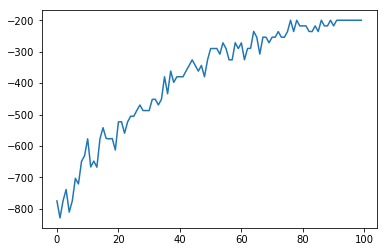

In [87]:
#main loop
for epoch in tqdm(range(n_epochs)):
    print("Epoch %s:"%epoch)
    
    crossovered = [crossover(choice(pool), choice(pool)) 
                   for _ in range(n_crossovers)]
#     <crossover random guys from pool, n_crossovers total>
    mutated = [mutation(crossovered[choice(range(len(crossovered)))]) for _ in range(n_mutations)]
#     <add several new policies at random, n_mutations total>
    assert type(crossovered) == type(mutated) == list
    
    #add new policies to the pool
    pool = pool + crossovered + mutated
#     pool = <add up old population with crossovers/mutations>
    pool_scores = [evaluate(env, policy) for policy in pool]
#     pool_scores = <evaluate all policies again>

#select pool_size best policies
    selected_indices = np.argsort(pool_scores)[-pool_size:]
    pool = [pool[i] for i in selected_indices]
    pool_scores = [pool_scores[i] for i in selected_indices]

    #print the best policy so far (last in ascending score order)
    print("best score:", pool_scores[-1])
    epoch_scores.append(pool_scores[-1])

plt.plot(range(len(epoch_scores)), epoch_scores)
first_best_policy = pool[-1]
s = env.reset()
total_reward = 0
step_num = 0
for ind in range(100):
    action = first_best_policy[s]
    s, reward, is_done, _ = env.step(action)
    total_reward += reward
    if (is_done):
        break
    step_num += 1 
file = file.append(pd.Series({"epochs":n_epochs, "pool_size":pool_size, "cross":n_crossovers, "mut":n_mutations, 
                              "score":pool_scores[-1], "isdone":is_done, "steps_num":step_num, "policy":pool[-1]}), 
                           ignore_index=True )
file.head()
file.to_csv("results.csv")

#### Видно, что такси понимает, что если ему стоять на месте или просто ходить, не подбирая пассажира, то оно получит наибольшую награду, так что придётся поменять систему, по которой такси плучает награду

In [1]:
from taxi_upgraded import TaxiEnvUpgr

In [2]:
env = TaxiEnvUpgr()

In [3]:
env.reset()
print(env.render())

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

None


In [4]:
import numpy as np
n_states = env.observation_space.n
n_actions = env.action_space.n
def get_random_policy():
    """
    Build a numpy array representing agent policy.
    This array must have one element per each of 16 environment states.
    Element must be an integer from 0 to 3, representing action
    to take from that state.
    """
    return np.random.randint(0, n_actions, n_states)

In [5]:
def sample_reward(env, policy, t_max=100):
    """
    Interact with an environment, return sum of all rewards.
    If game doesn't end on t_max (e.g. agent walks into a wall), 
    force end the game and return whatever reward you got so far.
    Tip: see signature of env.step(...) method above.
    """
    state = env.reset()
    total_reward = 0

    for ind in range(t_max):
        action = policy[state]
        state, reward, is_done, _ = env.step(action)
        total_reward += reward
        if (is_done):
            break
    return total_reward

In [6]:
def evaluate(env, policy, n_times=20, t_max=100):
    """Run several evaluations and average the score the policy gets."""
    rewards = []
    for _ in range(n_times):
        rewards.append(sample_reward(env, policy, t_max))
    return float(np.mean(np.array(rewards)))      

In [7]:
def crossover(policy1, policy2, p=0.5):
    """
    for each state, with probability p take action from policy1, else policy2
    """
    cross_policy = []
    
    return np.choose(np.random.choice(np.array([0, 1]), 
                     size = policy1.shape, 
                     p = [p, 1-p]),
                     choices=[policy1, policy2])

In [8]:
def mutation(policy, p=0.1):
    """
    for each state, with probability p replace action with random action
    Tip: mutation can be written as crossover with random policy
    """
#     <your code>
    return crossover(get_random_policy(), policy, p)
    

In [9]:
from taxi_upgraded_v2 import TaxiEnvUpgrV2

In [10]:
env = TaxiEnvUpgrV2()

In [11]:
n_epochs = 150 #how many cycles to make
pool_size = 150 #how many policies to maintain
n_crossovers = 80 #how many crossovers to make on each step
n_mutations = 80 #how many mutations to make on each tick

In [12]:
print("initializing...")
pool = [get_random_policy() for _ in range(pool_size)]
pool_scores = [sample_reward(env, policy) for policy in pool]


initializing...


In [13]:
from tqdm import tqdm
from random import choice
best_policy = []

In [ ]:
print("hello")

In [ ]:
for step_num in [400]:
#     pool = [get_random_policy() for _ in range(pool_size)]
#     pool_scores = [sample_reward(env, policy) for policy in pool]
#     epoch_scores = []
    for epoch in tqdm(range(50)):
        print("Epoch %s:"%epoch)

        crossovered = [crossover(choice(pool), choice(pool)) 
                       for _ in range(n_crossovers)]
        mutated = [mutation(crossovered[choice(range(len(crossovered)))], p=0.3) 
                   for _ in range(n_mutations)]
        
        pool = pool + crossovered + mutated
        pool_scores = [evaluate(env, policy, step_num) for policy in pool]
        
        selected_indices = np.argsort(pool_scores)[-pool_size:]
        pool = [pool[i] for i in selected_indices]
        pool_scores = [pool_scores[i] for i in selected_indices]

        print("best score: {0}, mean score: {1}".format(pool_scores[-1], np.mean(np.array(pool_scores))))
        epoch_scores.append(pool_scores[-1])
    
    plt.plot(range(len(epoch_scores)), epoch_scores)
    plt.show()
    best_policy.append(pool[-5:])
    first_best_policy = pool[-1]
    for i in range(50):
        state = env.reset()
        total_reward = 0
        step_num = 0
        for ind in range(400):
            action = first_best_policy[state]
            state, reward, is_done, _ = env.step(action)
            total_reward += reward
            if (is_done):
                break
            step_num += 1 
        print("{0}  {1}  {2}  {3}".format(i, is_done, reward, step_num))

    
      

In [15]:
from matplotlib import pylab as plt
import pandas as pd
%matplotlib inline

In [23]:
file = pd.DataFrame(columns=["epochs", "pool_size", "cross", "mut", "score", "isdone", "steps_num", "policy"])   
file = file.append(pd.Series({"epochs":n_epochs, "pool_size":pool_size, "cross":n_crossovers, "mut":n_mutations, 
                              "score":pool_scores[-1], "isdone":is_done, "steps_num":step_num, "policy":pool[-1]}), 
                           ignore_index=True )
file.head()
file.to_csv("results.csv")

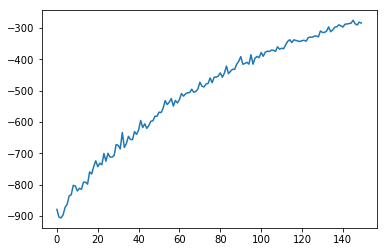

0  False  -2  400
1  False  -6  400
2  False  -1  400
3  False  -7  400
4  False  -8  400
5  False  -1  400
6  False  -7  400
7  False  -1  400
8  False  -4  400
9  False  -2  400
10  False  -1  400
11  False  -1  400
12  False  -8  400
13  False  -9  400
14  False  -1  400
15  False  -3  400
16  False  -1  400
17  False  -4  400
18  False  -1  400
19  False  -1  400
20  False  -6  400
21  False  -5  400
22  False  -1  400
23  False  -1  400
24  False  -8  400
25  False  -7  400
26  False  -1  400
27  False  -5  400
28  False  -1  400
29  False  10  400
30  False  -7  400
31  False  -1  400
32  False  -7  400
33  False  -8  400
34  False  -6  400
35  False  -5  400
36  False  -1  400
37  False  -8  400
38  False  -2  400
39  False  -4  400
40  False  -7  400
41  False  -1  400
42  False  -2  400
43  False  -1  400
44  False  -1  400
45  False  -1  400
46  False  -1  400
47  False  -4  400
48  False  -6  400
49  False  -1  400


In [16]:
plt.plot(range(len(epoch_scores)), epoch_scores)
plt.show()
first_best_policy = pool[-1]
for i in range(50):
    s = env.reset()
    total_reward = 0
    step_num = 0
    for ind in range(400):
        action = first_best_policy[s]
        s, reward, is_done, _ = env.step(action)
        total_reward += reward
        if (is_done):
            break
        step_num += 1 
    print("{0}  {1}  {2}  {3}".format(i, is_done, reward, step_num))


In [ ]:
print("hello")

Ссылка на фидбек по семинару: [link](https://docs.google.com/forms/d/e/1FAIpQLSf-08wFrEke6zKlysETYiqAjH5CRXtOKut5Q77Tr5rdVId7zA/)

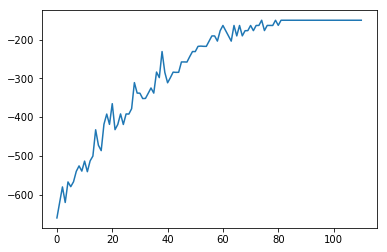

In [25]:
plt.plot(range(len(epoch_scores)), epoch_scores)
first_best_policy = pool[-1]

In [88]:
s = env.reset()
total_reward = 0
step_num = 0
for ind in range(100):
    action = first_best_policy[s]
    s, reward, is_done, _ = env.step(action)
    total_reward += reward
    if (is_done):
        break
    step_num += 1

In [89]:
print(step_num, is_done, total_reward)

100 False -350


In [65]:
print(is_done)

False
